In [12]:
32/512*16

1.0

Output Shape: torch.Size([3, 16, 16])


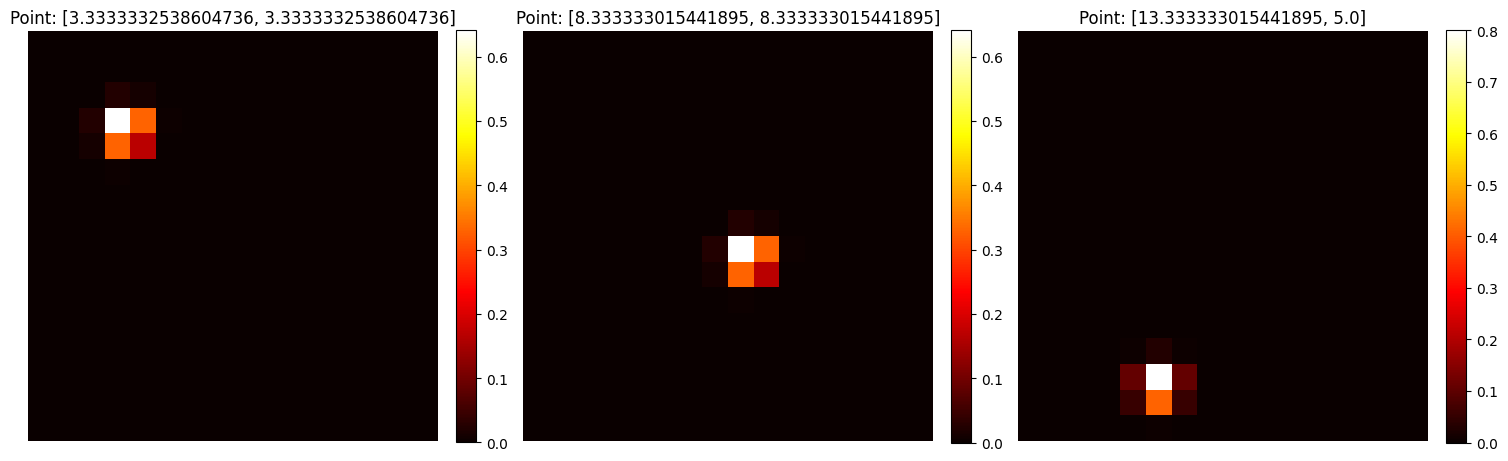

In [ ]:
import torch
import matplotlib.pyplot as plt



# --- Example Usage ---

# Define settings
H, W = 16, 16
coordinates = torch.tensor([
    [20.0, 20.0],  # Top-leftish
    [50.0, 50.0],  # Center
    [80.0, 30.0]   # Bottom-rightish
])
coordinates = coordinates/6
# Generate heatmaps
heatmap_tensor = generate_gaussian_heatmaps(coordinates, (H, W), sigma=0.5)

print(f"Output Shape: {heatmap_tensor.shape}") # Should be (3, 100, 100)

# --- Visualization (Optional) ---
# If you want to visualize the result
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    im = axes[i].imshow(heatmap_tensor[i].numpy(), cmap='hot', origin='upper')
    plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    axes[i].set_title(f"Point: {coordinates[i].tolist()}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:

predicted_coords = get_coords_from_heatmaps(heatmap_tensor)

print("Original Coords:\n", coordinates)
print("\nPredicted Coords (Sub-pixel):\n", predicted_coords)

# Calculate Error
error = (coordinates - predicted_coords).abs().mean()
print(f"\nMean Absolute Error: {error.item():.6f} pixels")

Original Coords:
 tensor([[ 3.3333,  3.3333],
        [ 8.3333,  8.3333],
        [13.3333,  5.0000]])

Predicted Coords (Sub-pixel):
 tensor([[ 3.3136,  3.3136],
        [ 8.3136,  8.3136],
        [ 5.0000, 13.3136]])

Mean Absolute Error: 2.787633 pixels
